# CO2 and GHG Emission Exploratory Data Analysis

The dataset contains emission data of C02 and Green House Gases of different countries from 1750 - 2019

[Data source](https://www.kaggle.com/datasets/srikantsahu/co2-and-ghg-emission-data)

## Load Data

In [1]:
# Import packages to use

import re  # We will use some regular expressions
import numpy as np  # Numpy to manipulate the data
import pandas as pd  # Pandas for working with dataframes

# These two will be for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data and store it in a dataframe
emm_df = pd.read_csv('emission data.csv')

### Get Information about the dataframe

In [4]:
# Get the shape of the data
# This helps you see the dimensions of the data without necessarily viewing it
# You also get to see the number of records and attributes without viewing the dataframe
emm_df.shape

(231, 268)

In [12]:
# The info function of dataframe gives us a good summary of the dataframe
# What the variable is i.e. type
# IndexRange, Columns, dara types in the dataframe
emm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 268 entries, Country to 2017
dtypes: float64(98), int64(169), object(1)
memory usage: 483.8+ KB


In [13]:
# Describe mostly reports statistics on the data
# We observe that we are dealing with mostly numerical data
emm_df.describe()

,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,...,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.214354e+05,2.429184e+05,3.644015e+05,4.859321e+05,6.075102e+05,7.374633e+05,8.674639e+05,9.975121e+05,1.127608e+06,1.257704e+06,...,1.398744e+10,1.431951e+10,1.469829e+10,1.504459e+10,1.543729e+10,1.578588e+10,1.617543e+10,1.653158e+10,1.691931e+10,1.732373e+10
std,1.060948e+06,2.122313e+06,3.183677e+06,4.245457e+06,5.307652e+06,6.443017e+06,7.578797e+06,8.714993e+06,9.851605e+06,1.098822e+07,...,8.981685e+10,9.188034e+10,9.454156e+10,9.661454e+10,9.929591e+10,1.013842e+11,1.040596e+11,1.061600e+11,1.088358e+11,1.115423e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.493352e+07,2.574326e+07,2.644592e+07,2.710177e+07,2.768984e+07,2.862802e+07,2.976871e+07,3.105887e+07,3.268508e+07,3.421887e+07
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.045568e+08,2.129394e+08,2.209573e+08,2.300825e+08,2.416023e+08,2.507415e+08,2.563229e+08,2.621147e+08,2.680755e+08,2.737319e+08
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.394520e+09,2.449266e+09,2.506229e+09,2.563067e+09,2.620797e+09,2.677380e+09,2.713781e+09,2.776195e+09,2.855434e+09,2.987929e+09
max,9.350528e+06,1.870472e+07,2.805891e+07,3.741677e+07,4.677829e+07,5.678467e+07,6.679472e+07,7.680843e+07,8.682581e+07,9.684318e+07,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12


### View the dataframe contents

In [15]:
# View the whole dataframe
emm_df

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,Yemen,0,0,0,0,0,0,0,0,0,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,Zambia,0,0,0,0,0,0,0,0,0,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08


In [19]:
# View a slice of the dataframe
# Row-wise slice
emm_df[:5]

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [24]:
# Slice out a single column
emm_df['1900']

0                0
1         31942752
2                0
3                0
4        317500256
          ...     
226              0
227    44821067136
228              0
229              0
230              0
Name: 1900, Length: 231, dtype: int64

In [20]:
# View a slice,
# Slice both the rows and columns
emm_df.iloc[: , :5]

,Country,1751,1752,1753,1754
0,Afghanistan,0,0,0,0
1,Africa,0,0,0,0
2,Albania,0,0,0,0
3,Algeria,0,0,0,0
4,Americas (other),0,0,0,0
...,...,...,...,...,...
226,Wallis and Futuna Islands,0,0,0,0
227,World,9350528,18704720,28058912,37416768
228,Yemen,0,0,0,0
229,Zambia,0,0,0,0


In [22]:
# View a slice, while specifying the columns you need
emm_df.loc[:, '2000':'2010']

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,7.171779e+07,7.252987e+07,7.359394e+07,7.478101e+07,7.572247e+07,7.704272e+07,7.868596e+07,8.095431e+07,8.515264e+07,9.191295e+07,1.003652e+08
1,2.364008e+10,2.451920e+10,2.540335e+10,2.636533e+10,2.739842e+10,2.844249e+10,2.952629e+10,3.065262e+10,3.183077e+10,3.301904e+10,3.421283e+10
2,1.969327e+08,2.001533e+08,2.039016e+08,2.081921e+08,2.123544e+08,2.166047e+08,2.204995e+08,2.244237e+08,2.287948e+08,2.331696e+08,2.377643e+08
3,2.118625e+09,2.202405e+09,2.291812e+09,2.382860e+09,2.470713e+09,2.577187e+09,2.677388e+09,2.785788e+09,2.894820e+09,3.015005e+09,3.132819e+09
4,6.097459e+10,6.290508e+10,6.485794e+10,6.686192e+10,6.887383e+10,7.095078e+10,7.306565e+10,7.523367e+10,7.746025e+10,7.961787e+10,8.187178e+10
...,...,...,...,...,...,...,...,...,...,...,...
226,0.000000e+00,1.465600e+04,4.030400e+04,6.595200e+04,9.160000e+04,1.209120e+05,1.502240e+05,1.795360e+05,2.015200e+05,2.308320e+05,2.601440e+05
227,1.040000e+12,1.060000e+12,1.090000e+12,1.110000e+12,1.140000e+12,1.170000e+12,1.200000e+12,1.230000e+12,1.260000e+12,1.290000e+12,1.330000e+12
228,2.776305e+08,2.936472e+08,3.092007e+08,3.262832e+08,3.449294e+08,3.647243e+08,3.858093e+08,4.065283e+08,4.285533e+08,4.528009e+08,4.759527e+08
229,1.379202e+08,1.398051e+08,1.417651e+08,1.438407e+08,1.459450e+08,1.481871e+08,1.504187e+08,1.522864e+08,1.543919e+08,1.567982e+08,1.593608e+08


In [23]:
# What issues can you observe from the output below???
emm_df['Country']

0                    Afghanistan
1                         Africa
2                        Albania
3                        Algeria
4               Americas (other)
                 ...            
226    Wallis and Futuna Islands
227                        World
228                        Yemen
229                       Zambia
230                     Zimbabwe
Name: Country, Length: 231, dtype: object

## Filter out countries

How do we go about solving this?

- Get a list of countries only

- Filter out non countries by finding items in the intersection


[DataSource](https://datahub.io/core/country-codes)

In [25]:
# Read another dataframe
country_df = pd.read_csv('country_list.csv')

# Oh here is another cool way of getting a few items
country_df.head(5)

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [26]:
emm_df.head(5)

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [27]:
# We use the merge function of dataframe to achieve this
# The `how` parameter determines what happens. In our case we use inner
# Inner specifies that we want to use intersection of keys from both frames
# Q. Could anything go wrong here????
merged_df = emm_df.merge(right=country_df, how='inner', left_on='Country', right_on='Name')

# Should we drop countries that have null entries?
# If so why? When should we drop null values?
# merged_df.dropna()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2010,2011,2012,2013,2014,2015,2016,2017,Name,Code
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08,Afghanistan,AF
1,Albania,0,0,0,0,0,0,0,0,0,...,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08,Albania,AL
2,Algeria,0,0,0,0,0,0,0,0,0,...,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09,Algeria,DZ
3,Andorra,0,0,0,0,0,0,0,0,0,...,1.029218e+07,1.078315e+07,1.127046e+07,1.174678e+07,1.220845e+07,1.268569e+07,1.319719e+07,1.371738e+07,Andorra,AD
4,Angola,0,0,0,0,0,0,0,0,0,...,3.881015e+08,4.182437e+08,4.514295e+08,4.838026e+08,5.182603e+08,5.530214e+08,5.883724e+08,6.237623e+08,Angola,AO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Uzbekistan,0,0,0,0,0,0,0,0,0,...,5.291389e+09,5.404435e+09,5.519557e+09,5.622211e+09,5.726692e+09,5.837362e+09,5.935287e+09,6.034286e+09,Uzbekistan,UZ
190,Vanuatu,0,0,0,0,0,0,0,0,0,...,3.290272e+06,3.422176e+06,3.535760e+06,3.642016e+06,3.795904e+06,3.963838e+06,4.133697e+06,4.315060e+06,Vanuatu,VU
191,Yemen,0,0,0,0,0,0,0,0,0,...,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08,Yemen,YE
192,Zambia,0,0,0,0,0,0,0,0,0,...,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08,Zambia,ZM


In [28]:
# Drop Name from country dataframe
merged_df.drop(labels='Name', axis=1, inplace=True)
merged_df.head(5)

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08,AF
1,Albania,0,0,0,0,0,0,0,0,0,...,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08,AL
2,Algeria,0,0,0,0,0,0,0,0,0,...,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09,DZ
3,Andorra,0,0,0,0,0,0,0,0,0,...,9.775552e+06,1.029218e+07,1.078315e+07,1.127046e+07,1.174678e+07,1.220845e+07,1.268569e+07,1.319719e+07,1.371738e+07,AD
4,Angola,0,0,0,0,0,0,0,0,0,...,3.592371e+08,3.881015e+08,4.182437e+08,4.514295e+08,4.838026e+08,5.182603e+08,5.530214e+08,5.883724e+08,6.237623e+08,AO


### Append global statistics

In [29]:
print('Initial shape: ', merged_df.shape)

# What if I wanted to add data to the dataframe?
# In this case, I want to return the global statistics
# But also have a way to remove it so that it doesn't corrupt my analysis

# Start by slicing off the data of interest
world = emm_df.loc[emm_df['Country'] == 'World']

# create a copy of the data inorder to update it
world = world[world['Country'] == 'World']  
world['Code'] = 'Wrld'

# Append the data to the dataframe
# merged_df = merged_df.append(world)
merged_df = pd.concat(merged_df, world)

print('Final shape: ', merged_df.shape)

Initial shape:  (194, 269)
Final shape:  (195, 269)


/tmp/ipykernel_521083/1014124378.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(world)


### Remove global statistics

In [34]:
# A function to remove world index from the data
def drop_global_stats(df):
    return df.drop(labels=227, axis='index', inplace=False)

# Total Emissions

In [30]:
# Separate non-numeric columns from numeric ones
df_cols = list(merged_df)
non_num_col = ['Country', 'Code']
num_cols = [col for col in df_cols if col not in non_num_col]

# Add a column having the total emissions which will be the column-wise addition of annual entries for each country
# Q. Do you notice anything interesting here?? If you were to do the same with native python how would you achieve it?
merged_df['TotalEmission'] = merged_df[num_cols].sum(axis=1)
merged_df.tail(5)

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2010,2011,2012,2013,2014,2015,2016,2017,Code,TotalEmission
190,Vanuatu,0,0,0,0,0,0,0,0,0,...,3.290272e+06,3.422176e+06,3.535760e+06,3.642016e+06,3.795904e+06,3.963838e+06,4.133697e+06,4.315060e+06,VU,1.007187e+08
191,Yemen,0,0,0,0,0,0,0,0,0,...,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08,YE,1.244945e+10
192,Zambia,0,0,0,0,0,0,0,0,0,...,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08,ZM,6.042416e+09
193,Zimbabwe,0,0,0,0,0,0,0,0,0,...,6.302928e+08,6.397327e+08,6.473473e+08,6.588835e+08,6.707499e+08,6.816575e+08,6.915901e+08,7.019879e+08,ZW,2.434486e+10
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12,Wrld,5.749795e+13


### Global trend in all years

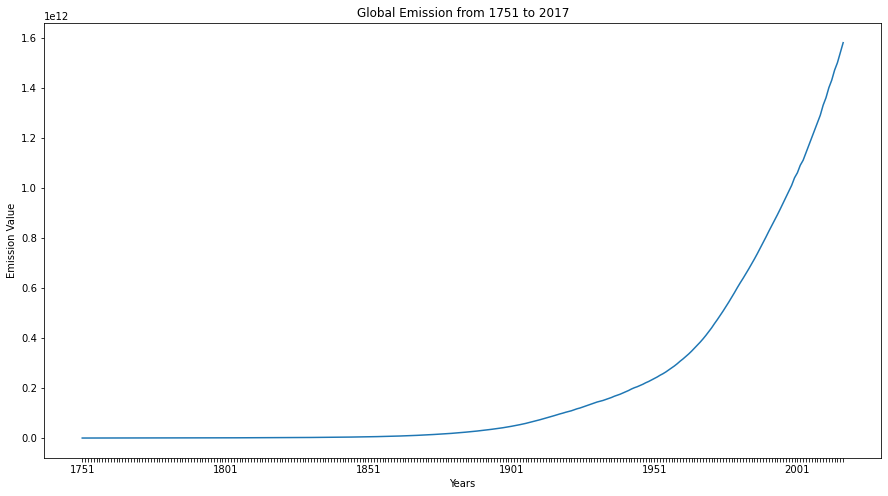

In [32]:
num_wrld_vals = world[num_cols]
# x -> Emission value
# y -> Year value
# select the row to plot
row = num_wrld_vals.iloc[0]

# You can specify the figure size
plt.figure(figsize=(15, 8))

# Seaborn allows you to pass the data and if x and y are obvious
# They are implicitly extracted for plotting
ax = sns.lineplot(data=row, markers=True)

# Remember to always mark your graph
ax.set(xlabel='Years', ylabel='Emission Value')

#  x ticks
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 50 == 0:  # every 50th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# Adding title
plt.title('Global Emission from 1751 to 2017')

# You can save the plot!
plt.savefig('global-emission-stats.png')

# Displaying
plt.show()

## 10 Most Emitting Countries Across the Years

In [35]:
# in merged_df sort the values in ascending order by total emission
# in resulting df pick the tail and remove world, why? 

sorted_df = merged_df.sort_values(by=['TotalEmission'])
sorted_tail = sorted_df.tail(11) # Taking 11 since global stats are included

most_polluting = sorted_tail.loc[:, :].copy() # different way of copying, this creates a deep copy
most_polluting = drop_global_stats(most_polluting) # dropping global stats
most_polluting

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2010,2011,2012,2013,2014,2015,2016,2017,Code,TotalEmission
184,Ukraine,0,0,0,0,0,0,0,0,0,...,2.396210e+10,2.426917e+10,2.457288e+10,2.486895e+10,2.512553e+10,2.534911e+10,2.558427e+10,2.579639e+10,UA,8.243893e+11
83,India,0,0,0,0,0,0,0,0,0,...,3.343090e+10,3.524807e+10,3.723183e+10,3.922971e+10,4.143724e+10,4.371365e+10,4.609110e+10,4.855786e+10,IN,9.941642e+11
31,Canada,0,0,0,0,0,0,0,0,0,...,2.795562e+10,2.851640e+10,2.908007e+10,2.964897e+10,3.021697e+10,3.078255e+10,3.134074e+10,3.191352e+10,CA,1.157745e+12
142,Poland,0,0,0,0,0,0,0,0,0,...,2.460599e+10,2.493768e+10,2.526190e+10,2.558181e+10,2.588936e+10,2.619998e+10,2.652221e+10,2.684882e+10,PL,1.228298e+12
90,Japan,0,0,0,0,0,0,0,0,0,...,5.352984e+10,5.479124e+10,5.609332e+10,5.740739e+10,5.867156e+10,5.989523e+10,6.109955e+10,6.230461e+10,JP,1.856514e+12
61,France,0,0,0,0,0,0,0,0,0,...,3.524877e+10,3.562156e+10,3.599568e+10,3.636993e+10,3.671351e+10,3.706167e+10,3.741177e+10,3.776808e+10,FR,2.105291e+12
37,China,0,0,0,0,0,0,0,0,0,...,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11,CN,3.404863e+12
67,Germany,0,0,0,0,0,0,0,0,0,...,8.491515e+10,8.572595e+10,8.654115e+10,8.737379e+10,8.816743e+10,8.896450e+10,8.976626e+10,9.056563e+10,DE,5.025380e+12
186,United Kingdom,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,7.399123e+10,7.446104e+10,7.494871e+10,7.542644e+10,7.586514e+10,7.628780e+10,7.668635e+10,7.707106e+10,GB,5.926017e+12
187,United States,0,0,0,0,0,0,0,0,0,...,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11,US,1.774135e+13


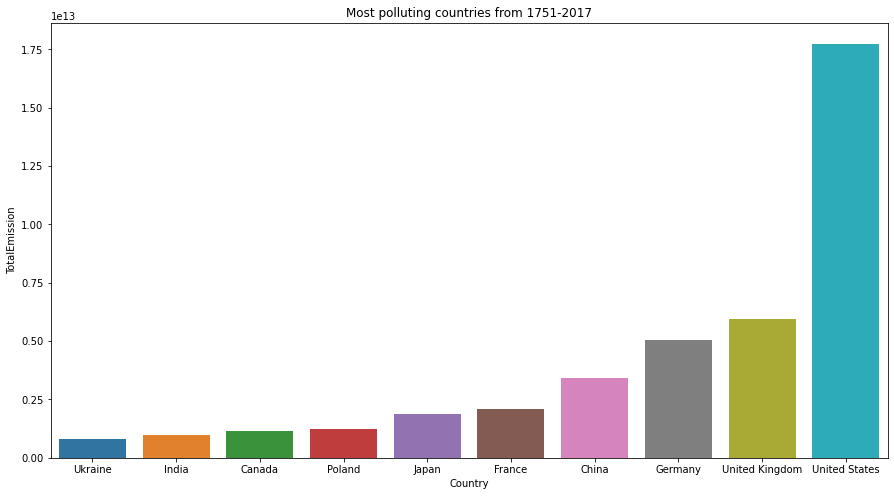

In [37]:
# plt a bar graph
# x represents the country
# y represents the pollution value

plt.figure(figsize=(15,8))
ax = sns.barplot(data=most_polluting, x='Country', y='TotalEmission')
plt.title('Most polluting countries from 1751-2017')
plt.savefig('most-polluting-countries')
plt.show()

## 10 Least Emitting Countries Across the Years

In [36]:
# We have a sorted dataframe, which is sorted in ascending order
# The least are at the top
least_polluting = sorted_df.head(10)
least_polluting

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2010,2011,2012,2013,2014,2015,2016,2017,Code,TotalEmission
182,Tuvalu,0,0,0,0,0,0,0,0,0,...,179536.0,186864.0,197856.0,208848.0,219840.0,231835.0,243968.0,256923.0,TV,3381798.0
132,Niue,0,0,0,0,0,0,0,0,0,...,201520.0,208848.0,216176.0,223504.0,234496.0,246491.0,258624.0,271579.0,NU,5539894.0
102,Liechtenstein,0,0,0,0,0,0,0,0,0,...,816426.0,993206.0,1178524.0,1371064.0,1532165.0,1691050.0,1839412.0,2000665.0,LI,12669164.0
112,Marshall Islands,0,0,0,0,0,0,0,0,0,...,1509568.0,1612160.0,1714752.0,1817344.0,1919936.0,2031892.0,2145131.0,2266040.0,MH,27122679.0
119,Montserrat,0,0,0,0,0,0,0,0,0,...,1205456.0,1245760.0,1289728.0,1341024.0,1388656.0,1438382.0,1489072.0,1539754.0,MS,31624776.0
181,Turks and Caicos Islands,0,0,0,0,0,0,0,0,0,...,1875968.0,2066496.0,2264352.0,2462208.0,2667392.0,2881595.0,3099955.0,3318276.0,TC,32976594.0
5,Anguilla,0,0,0,0,0,0,0,0,0,...,2022528.0,2165424.0,2308320.0,2443888.0,2586784.0,2735961.0,2888033.0,3040078.0,AI,36089112.0
42,Cook Islands,0,0,0,0,0,0,0,0,0,...,1531552.0,1601168.0,1670784.0,1740400.0,1810016.0,1885986.0,1962827.0,2044872.0,CK,38166197.0
94,Kiribati,0,0,0,0,0,0,0,0,0,...,1454608.0,1516896.0,1579184.0,1641472.0,1703760.0,1771733.0,1840486.0,1913895.0,KI,42345650.0
38,Christmas Island,0,0,0,0,0,0,0,0,0,...,1330032.0,1330032.0,1330032.0,1330032.0,1330032.0,1330032.0,1330032.0,1330032.0,CX,55146864.0


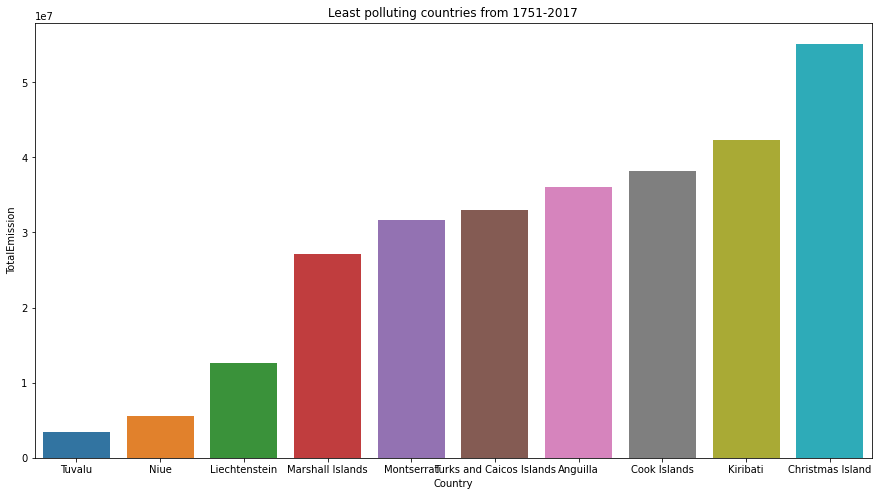

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(data=least_polluting, x='Country', y='TotalEmission')
plt.title('Least polluting countries from 1751-2017')
plt.savefig('least-polluting-countries')
plt.show()

# Emissions per century

In [40]:
# Define centuries
#   *(100 yrs)
#   * 1700s, 1800s, 1900s, 2000 ...

# define lists to store centuries
_17, _18, _19, _20 = [], [], [], []

years = list(merged_df[num_cols].columns)
for year in years:
    if re.match(r'17[0-9][0-9]$', year):
        _17.append(year)
    elif re.match(r'18[0-9][0-9]$', year):
        _18.append(year)
    elif re.match(r'19[0-9][0-9]$', year):
        _19.append(year)
    else:
        _20.append(year)

In [61]:
def century_statistics(century, threshold):
    cent_lst = [_17, _18, _19, _20]
    year_lst, century_name, col_name = None, None, None

    # selector
    if century == '1700':
        year_lst = cent_lst[0]
        century_name = '1700s'
        col_name = 'sum_' + century_name

    elif century == '1800':
        year_lst = cent_lst[1]
        century_name = '1800s'
        col_name = 'sum_' + century_name

    elif century == '1900':
        year_lst = cent_lst[2]
        century_name = '1900s'
        col_name = 'sum_' + century_name

    elif century == '2000':
        year_lst = cent_lst[3]
        century_name = '2000s'
        col_name = 'sum_' + century_name

    else:
        print('No such century')
        return

    # Obtain a subset of the dataframe for the given century list
    cent_df = merged_df.loc[:, year_lst]
    merged_df[col_name] = cent_df.sum(axis=1)

    # Obtain those countries above the given threshold
    cent_polluting_countries = merged_df.loc[merged_df[col_name] > threshold]

    # drop cumulative global stats
    cent_polluting_countries = drop_global_stats(cent_polluting_countries)

    # plot
    plt.figure(figsize=(25, 8))
    ax = sns.barplot(data=cent_polluting_countries, x='Country', y=col_name)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)
    ax.set(ylabel='Emission in ' + century_name)
    plt.show()

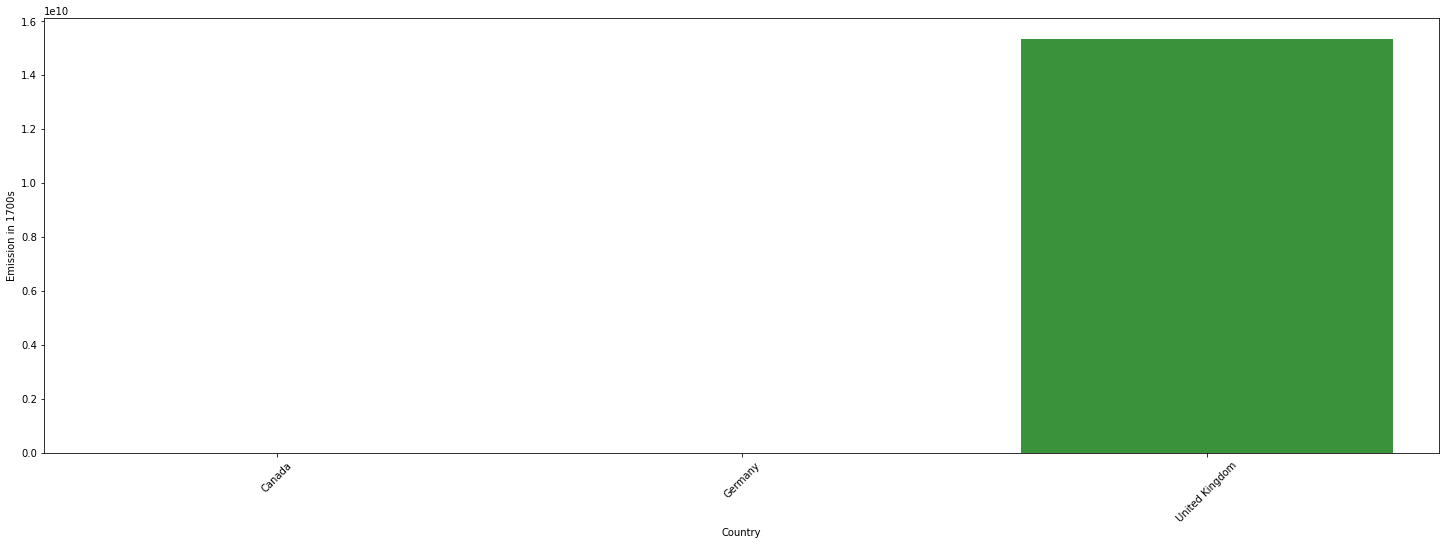

In [45]:
century_statistics('1700', 0)

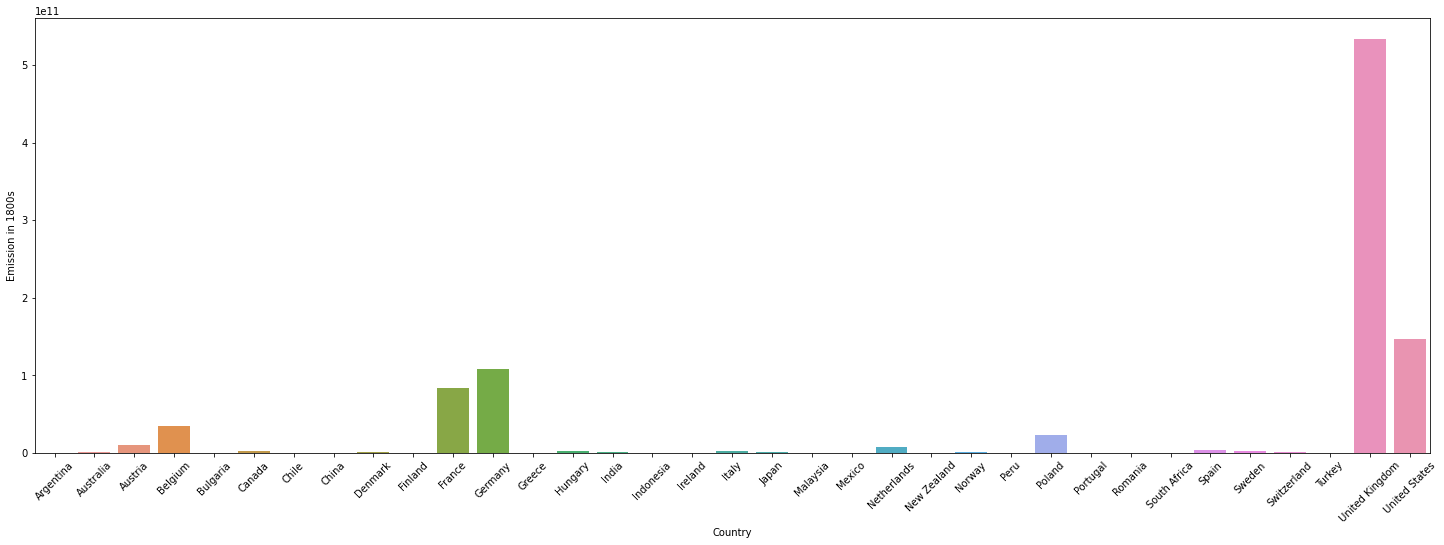

In [46]:
century_statistics('1800', 0)

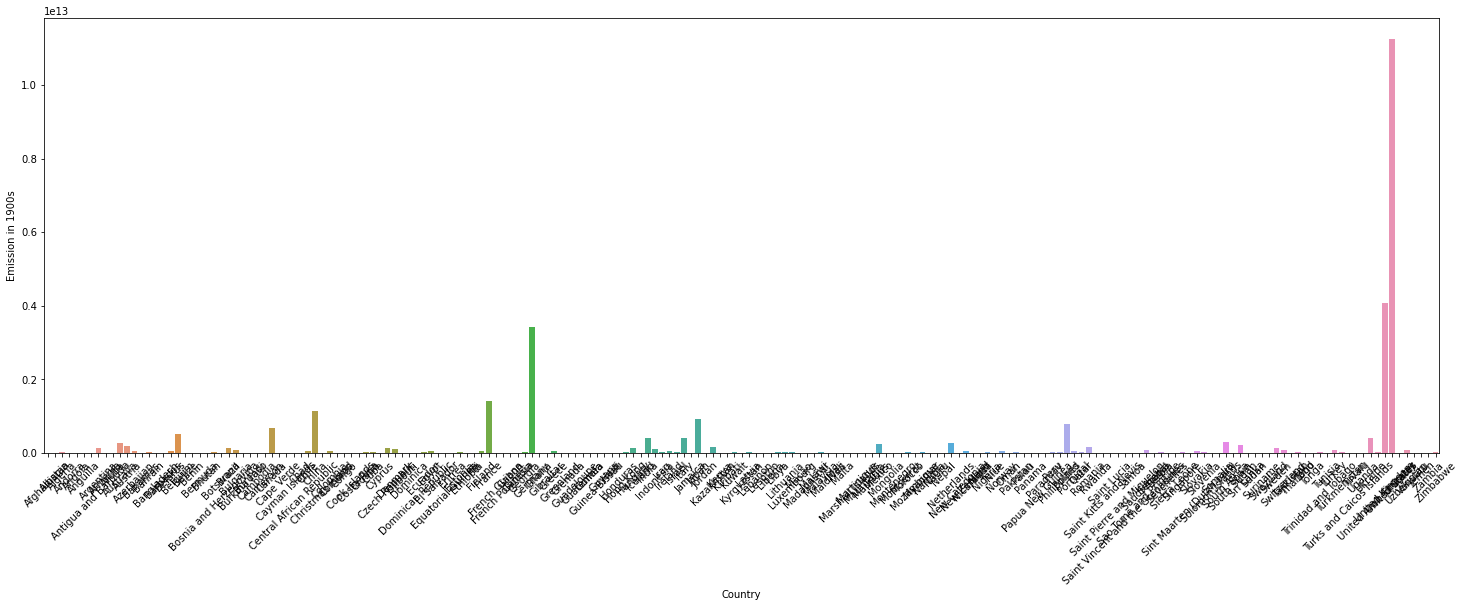

In [62]:
century_statistics('1900', 0)

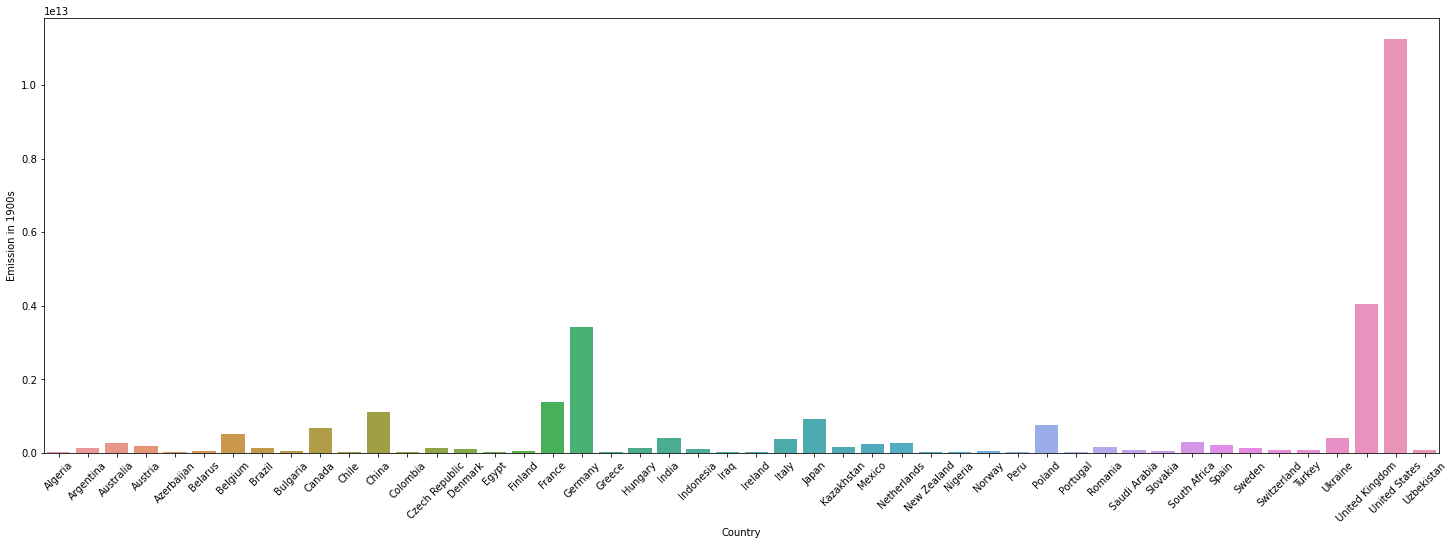

In [64]:
century_statistics('1900', 2.84e+10)

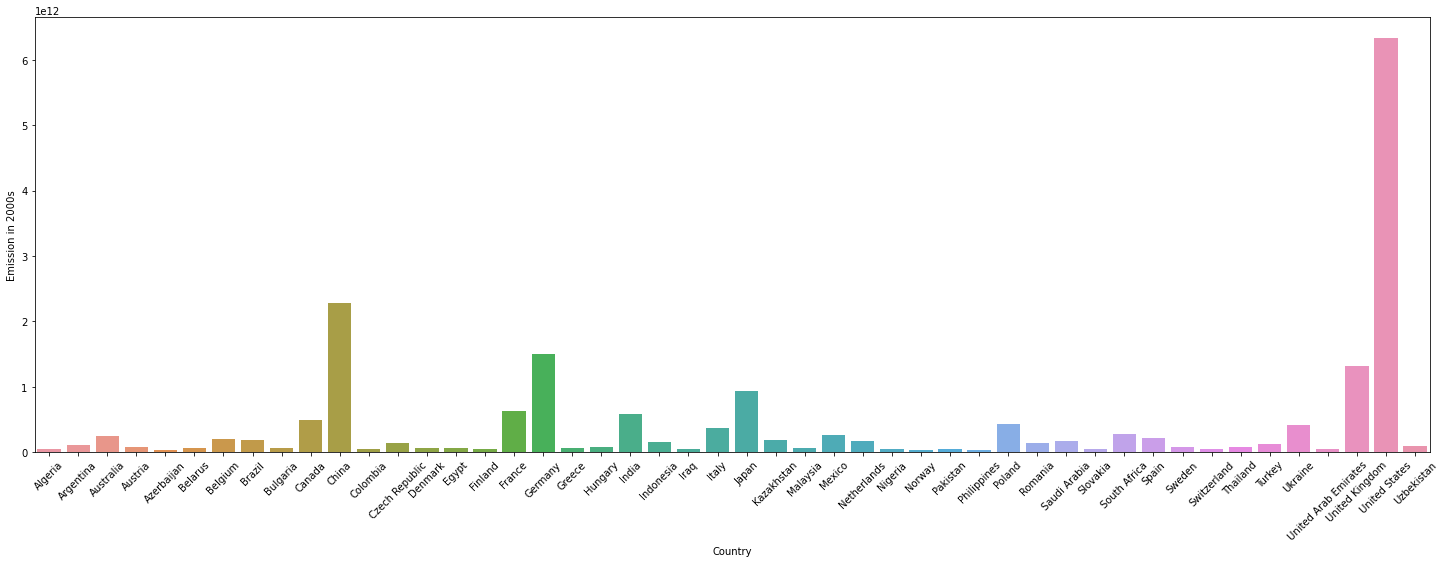

In [65]:
century_statistics('2000', 3.841050e+10)

In [17]:
# Cumulative
# Total emissions
# 10 most emitting countries
# 10 least emitting countries

# ------------------------
# Emissions per century
# ------------------------
# Total emissions
# Year with highest pollution in century
# 10 most emitting countries in century
# 10 least emitting countries in century

# TODO:
# ------------------------
# Emission by region
# ------------------------
# Total emissions
# 10 most emitting countries in region
# 10 least emitting countries in region

# Year when each country began pollution

### Materials of interest

[When to drop null values](https://www.kaggle.com/questions-and-answers/205588)

[Shallow copy vs deep copy](https://community.dataquest.io/t/equals-vs-shallow-copy-vs-deep-copy-in-pandas-dataframes/514515)

Sites for data
    - [OWID](https://ourworldindata.org/),
    - [WB Data](https://data.worldbank.org/),
    - [Kaggle](https://www.kaggle.com/datasets),
    - [Statista](https://www.statista.com/chartoftheday/)